In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import theta.preprocessing as pp
import theta.plot as tpt
from IPython.display import display, Markdown, Latex
import theta.modelling as tm

from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline



df = pd.read_csv('/Users/mac/Downloads/german_credit_data1.csv')
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
pp.explore_cat_values(data = df, columns = pp.select_dtype(data = df, dtype = 'object'))

### Categorical columns in dataset

**Sex**

['male' 'female']


**Housing**

['own' 'free' 'rent']


**Saving accounts**

[nan 'little' 'quite rich' 'rich' 'moderate']


**Checking account**

['little' 'moderate' nan 'rich']


**Purpose**

['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


**Risk**

['good' 'bad']


In [3]:
df['Saving accounts'] = df['Saving accounts'].apply(pp.acc_label_encode)
df['Checking account'] = df['Checking account'].apply(pp.acc_label_encode)
df['Housing'] = df['Housing'].apply(pp.hse_label_encode)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,2,0,1,1169,6,radio/TV,good
1,1,22,female,2,2,1,2,5951,48,radio/TV,bad
2,2,49,male,1,2,1,0,2096,12,education,good
3,3,45,male,2,0,1,1,7882,42,furniture/equipment,good
4,4,53,male,2,0,1,1,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,2,1,0,1736,12,furniture/equipment,good
996,996,40,male,3,2,1,1,3857,30,car,good
997,997,38,male,2,2,1,0,804,12,radio/TV,good
998,998,23,male,2,0,1,1,1845,45,radio/TV,bad


In [4]:
df = pp.bin_values(data = df, col = 'Age', new_col_name = 'Age_grade', 
           bins = range(10, 120, 10), labels = [str(i) + 's' for i in range(10,110,10)])

## 2. Exploratory Data Analysis

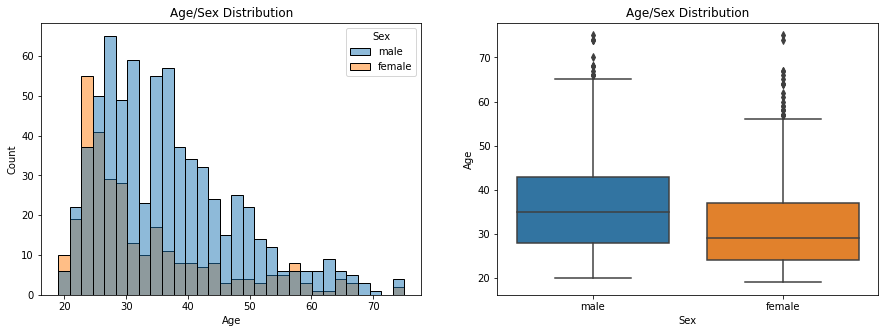

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

1. how many men and women have good risk and bad risk
2. what is the age bracket with in terms of good risk and bad risk?
3. are there relationships between type of savings $ checking accounts and risk?
4. Are there any linkages between amounts and bad risks?
5. Which purpose has the highest good and bad risk?
6. for what puprose do men and women take on risks?
7. what is the age bracket that takes on the most risk for men and women

#### Risk type for Males and Females

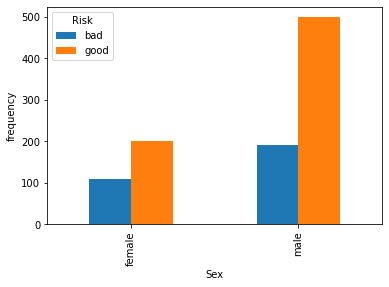

In [6]:
# def plot_by(data = 'df', primary_col = 'column', sec_column = 'column', plot = 'plot', title = '#### markdown title'):
#     display(Markdown(title))
#     cat_values = select_dtype(data = df, dtype ='object')
#     df.groupby(primary_col)[sec_column].value_counts().unstack().plot(kind = plot,
#                                                                          xlabel = primary_col,
#                                                                          ylabel = 'frequency')
#     plt.show()

tpt.plot_by(data = df, primary_col = 'Sex', sec_column = 'Risk', plot = 'bar', 
        title = '#### Risk type for Males and Females' )

#### Age grade by risk

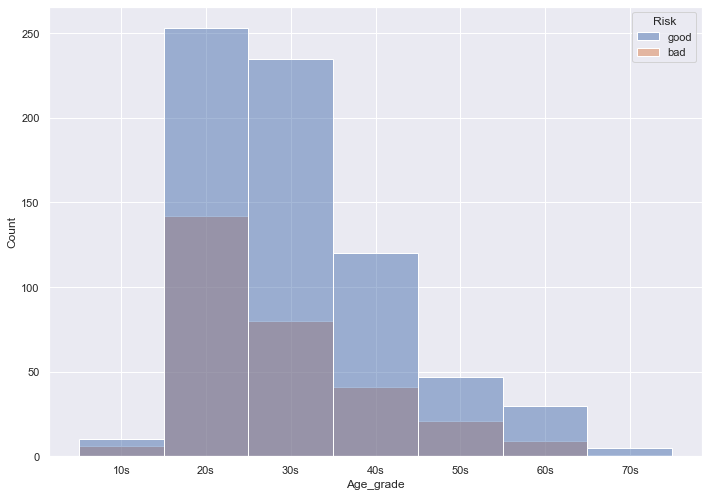

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
display(Markdown('#### Age grade by risk'))
sns.histplot(df, x='Age_grade', hue="Risk")

#### Saving accounts and risk

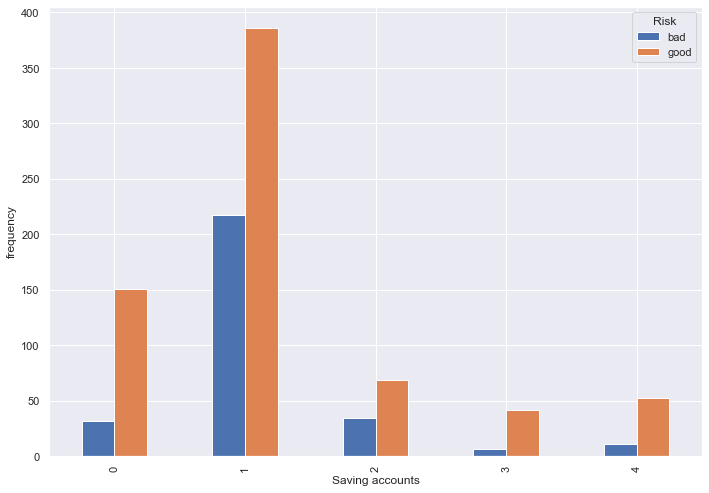

#### Checking accounts and risk

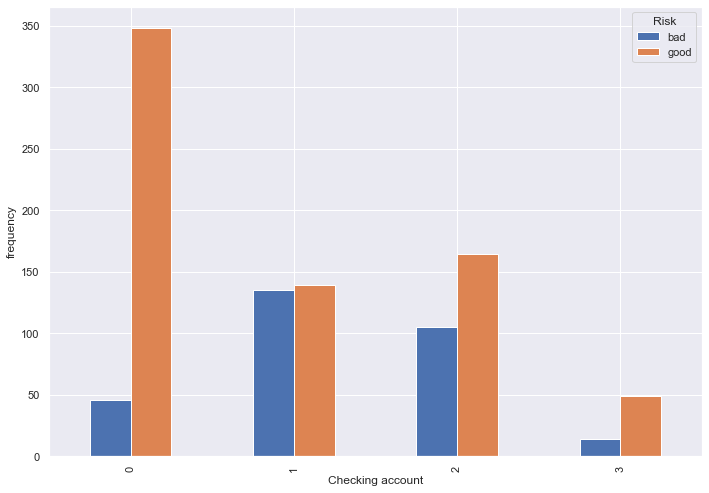

In [8]:
tpt.plot_by(data = df, primary_col = 'Saving accounts', sec_column = 'Risk', plot = 'bar', 
        title = '#### Saving accounts and risk' )
tpt.plot_by(data = df, primary_col = 'Checking account', sec_column = 'Risk', plot = 'bar', 
        title = '#### Checking accounts and risk' )

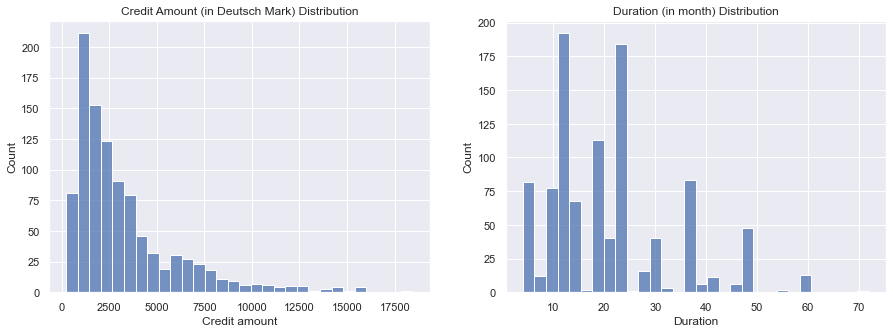

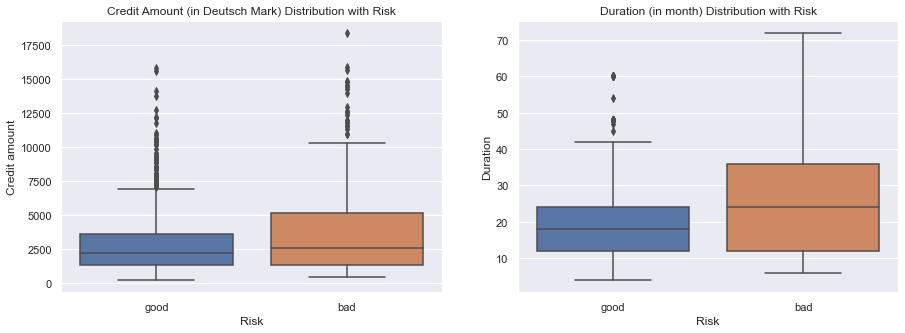

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Credit amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(df, x='Duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Credit amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

#### Risk type for each Purpose

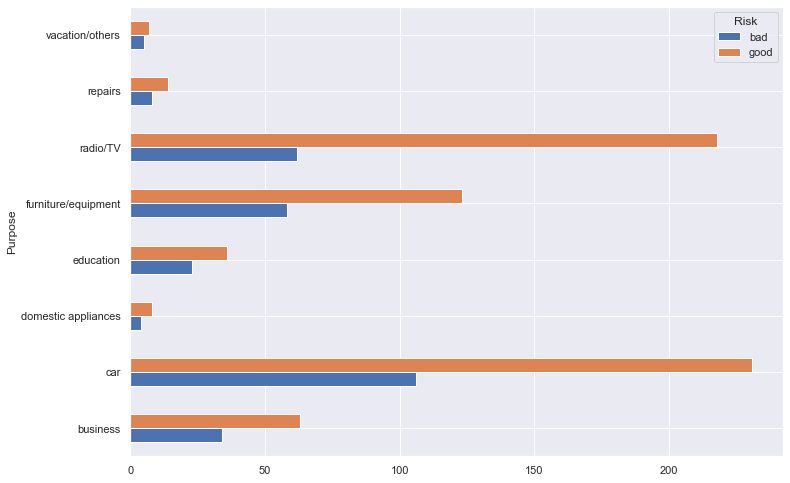

In [10]:
tpt.plot_by(data = df, primary_col = 'Purpose', sec_column = 'Risk', plot = 'barh', 
        title = '#### Risk type for each Purpose' )

#### Purpose by Gender

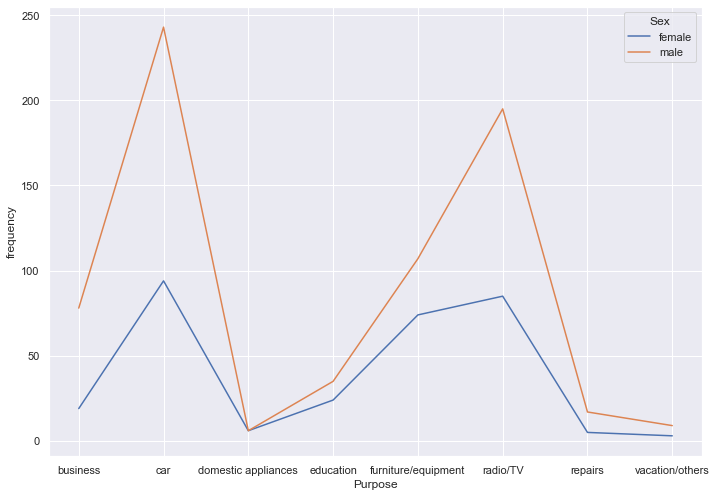

In [11]:
tpt.plot_by(data = df, primary_col = 'Purpose', sec_column = 'Sex', plot = 'line', 
        title = '#### Purpose by Gender' )

In [12]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_grade
0,0,67,male,2,2,0,1,1169,6,radio/TV,good,60s
1,1,22,female,2,2,1,2,5951,48,radio/TV,bad,20s
2,2,49,male,1,2,1,0,2096,12,education,good,40s
3,3,45,male,2,0,1,1,7882,42,furniture/equipment,good,40s
4,4,53,male,2,0,1,1,4870,24,car,bad,50s
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,2,1,0,1736,12,furniture/equipment,good,30s
996,996,40,male,3,2,1,1,3857,30,car,good,30s
997,997,38,male,2,2,1,0,804,12,radio/TV,good,30s
998,998,23,male,2,0,1,1,1845,45,radio/TV,bad,20s


In [13]:
pp.bin_values(data = df, col = 'Age', new_col_name = 'Age_grade', bins = range(10,120,10), labels = [str(i) + 's' for i in range(10,110,10)])

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_grade
0,0,67,male,2,2,0,1,1169,6,radio/TV,good,60s
1,1,22,female,2,2,1,2,5951,48,radio/TV,bad,20s
2,2,49,male,1,2,1,0,2096,12,education,good,40s
3,3,45,male,2,0,1,1,7882,42,furniture/equipment,good,40s
4,4,53,male,2,0,1,1,4870,24,car,bad,50s
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,2,1,0,1736,12,furniture/equipment,good,30s
996,996,40,male,3,2,1,1,3857,30,car,good,30s
997,997,38,male,2,2,1,0,804,12,radio/TV,good,30s
998,998,23,male,2,0,1,1,1845,45,radio/TV,bad,20s


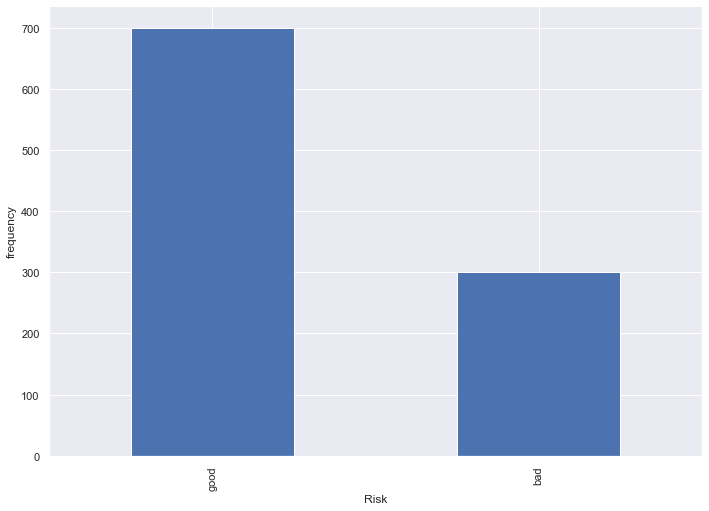

In [14]:
df['Risk'].value_counts().plot(kind = 'bar',
                              xlabel = 'Risk',
                              ylabel = 'frequency')

#### Age group and Risk

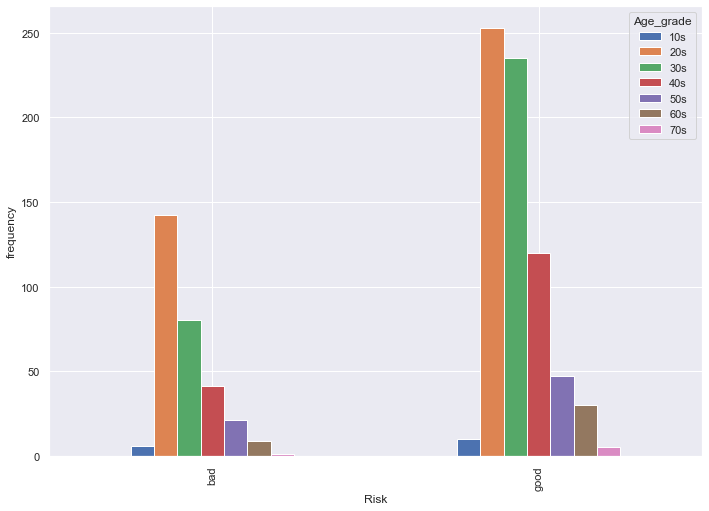

In [15]:
tpt.plot_by(data = df, primary_col = 'Risk', sec_column = 'Age_grade', plot = 'bar', 
        title = '#### Age group and Risk' )

In [16]:
df = tm.label_encoder(df, pp.select_dtype(data = df, dtype = 'object'))

In [17]:
rfc = RandomForestClassifier(random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)
etc = ExtraTreesClassifier(random_state = 42)
dtc = DecisionTreeClassifier(random_state = 42)

Over = RandomOverSampler(sampling_strategy = 'minority')
Under = RandomUnderSampler(sampling_strategy = 'majority')
pipeline = Pipeline(steps=[('o', Over), ('u', Under)])

cols  = ['Unnamed: 0', 'Age_grade']
df.drop(cols, axis = 1, inplace = True)


x = df.drop('Risk', axis = 1)
y = df['Risk']

x_resampled, y_resampled = pipeline.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [18]:
tm.bench_mark(x_train, x_test, y_train, y_test, algs = [rfc, gbc, dtc, etc])    

RandomForestClassifier(random_state=42) 
 RandomForestClassifier test Score : 0.8857142857142857 
 recall_Score : 0.8285714285714286 
 f1_Score : 0.8787878787878788 
 precision_Score : 0.9354838709677419 
 [[132   8]
 [ 24 116]] 
 *****************************
GradientBoostingClassifier(random_state=42) 
 GradientBoostingClassifier test Score : 0.7928571428571428 
 recall_Score : 0.75 
 f1_Score : 0.7835820895522388 
 precision_Score : 0.8203125 
 [[117  23]
 [ 35 105]] 
 *****************************
DecisionTreeClassifier(random_state=42) 
 DecisionTreeClassifier test Score : 0.8071428571428572 
 recall_Score : 0.7 
 f1_Score : 0.7839999999999999 
 precision_Score : 0.8909090909090909 
 [[128  12]
 [ 42  98]] 
 *****************************
ExtraTreesClassifier(random_state=42) 
 ExtraTreesClassifier test Score : 0.8821428571428571 
 recall_Score : 0.8428571428571429 
 f1_Score : 0.8773234200743494 
 precision_Score : 0.9147286821705426 
 [[129  11]
 [ 22 118]] 
 ********************

From results, the Random Forest Classifier model outperforms others 

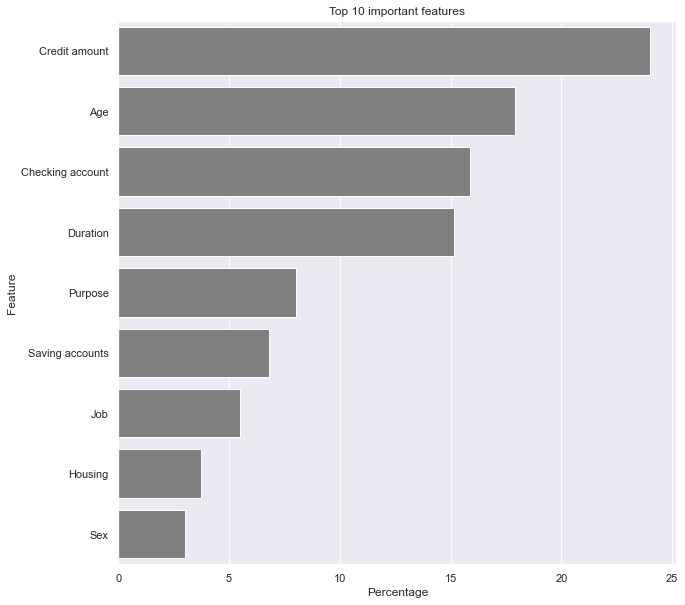

In [20]:
tpt.feature_imp(model = rfc, train_set = x_train, feature_num = 10, size = (10,10), colour = 'grey')